In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression # Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.metrics import mean_squared_error, r2_score # error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [142]:
data = pd.read_csv('datos_limpios.csv') #Lectura de los datos 

Usamos los datos limpios que hemos hecho 


In [143]:
data

,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,1.0,1.0,177.0,5.0,90000.0,3,9
1,0.0,2.0,18.0,3.0,65000.0,4,5
2,0.0,1.0,116.0,7.0,60000.0,4,5
3,1.0,1.0,94.0,2.0,55000.0,4,5
4,0.0,2.0,107.0,12.0,120000.0,4,1
...,...,...,...,...,...,...,...
6244,0.0,3.0,34.0,20.0,200000.0,3,7
6245,1.0,0.0,116.0,3.0,50000.0,0,2
6246,0.0,1.0,42.0,4.0,55000.0,2,4
6247,1.0,2.0,97.0,14.0,140000.0,2,6


Primero haremos regresion lineal para una variable, lo realizaremos las caracteristicas 'Years of Experiene' y 'Race' ya que una tiene mucha correlacion con la caracteristica a medir y la otra muy poca.

In [144]:
x1 = data['Years of Experience']
x2 = data['Race']
y = data['Salary']

Dividimos los datos en datos de prueba y datos de entreanamiento. 

In [145]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state=0)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.25, random_state=0)

In [146]:
x1_train, x1_test = np.array(x1_train).reshape(-1, 1), np.array(x1_test).reshape(-1, 1)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)
x2_train, x2_test = np.array(x2_train).reshape(-1, 1), np.array(x2_test).reshape(-1, 1)

m = [[7041.82692279]], b = [60285.42601148]
Mean squared error: 923223696.12
Coefficient of determination: 0.67


Text(0, 0.5, 'Salarios')

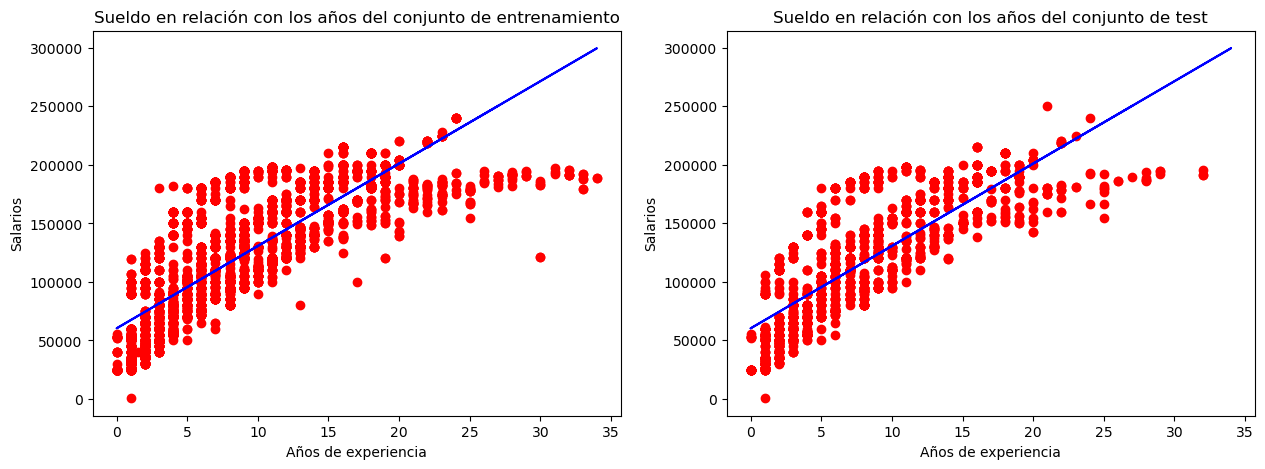

In [147]:
#Crear modelo de regresión lineal simple con el conjunto de entrenamiento
regresion_lineal = LinearRegression()
#Ajustar el modelo usando el modelo de la clase (debe tener mismo numero de filas tanto x como y)
regresion_lineal.fit(x1_train, y_train)
#Creando un vector de predicciones, se debe tomar solo los valores independientes
y1_pred = regresion_lineal.predict(x1_test)

# The coefficients
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) 
print("Mean squared error: %.2f" % mean_squared_error(y_test, y1_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y1_pred))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x1_train, y_train, color="red",label='Sample data')
plt.plot(x1_train, regresion_lineal.predict(x1_train), color="blue",label='Regression model')
plt.title("Sueldo en relación con los años del conjunto de entrenamiento")
plt.xlabel("Años de experiencia")
plt.ylabel("Salarios")


plt.subplot(1,2,2)
plt.scatter(x1_test, y_test, color="red")
plt.plot(x1_train, regresion_lineal.predict(x1_train), color="blue")
plt.title("Sueldo en relación con los años del conjunto de test")
plt.xlabel("Años de experiencia")
plt.ylabel("Salarios")

m = [[372.5989461]], b = [115334.83562445]
Mean squared error: 2764326693.19
Coefficient of determination: -0.00


Text(0, 0.5, 'Salarios')

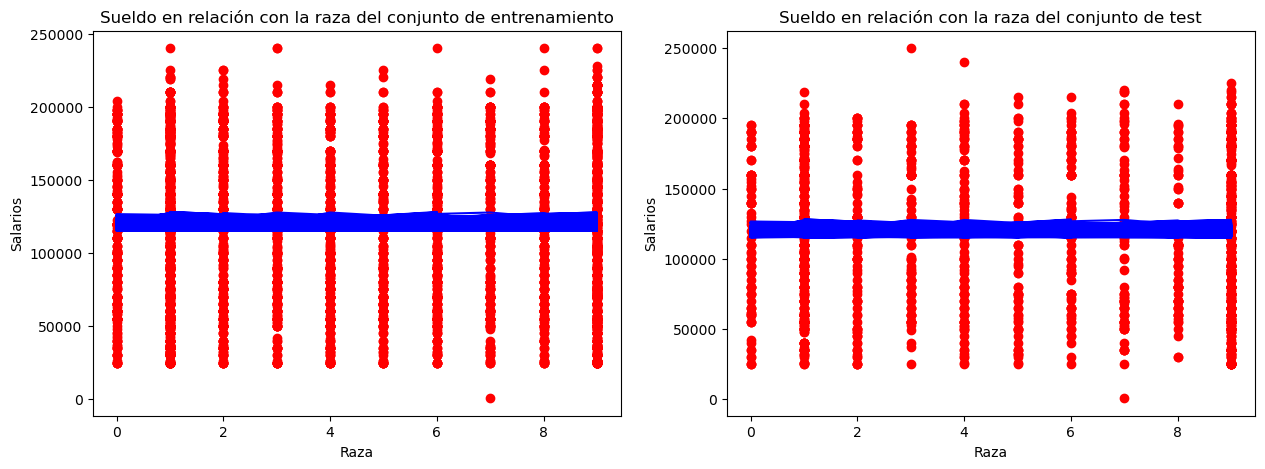

In [148]:
regresion_lineal.fit(x2_train, y_train)
#Creando un vector de predicciones, se debe tomar solo los valores independientes
y2_pred = regresion_lineal.predict(x2_test)

# The coefficients
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) 
print("Mean squared error: %.2f" % mean_squared_error(y_test, y2_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y2_pred))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x2_train, y_train, color="red",label='Sample data')
plt.plot(x2_train, regresion_lineal.predict(x1_train), color="blue",label='Regression model')
plt.title("Sueldo en relación con la raza del conjunto de entrenamiento")
plt.xlabel("Raza")
plt.ylabel("Salarios")


plt.subplot(1,2,2)
plt.scatter(x2_test, y_test, color="red")
plt.plot(x2_train, regresion_lineal.predict(x1_train), color="blue")
plt.title("Sueldo en relación con la raza del conjunto de test")
plt.xlabel("Raza")
plt.ylabel("Salarios")

## Regresion lineal entera 

In [149]:
X = data.drop(['Salary'], axis=1)
Y = data['Salary']
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)


In [150]:
regresion_lineal.fit(X_train,Y_train)
Y_pred = regresion_lineal.predict(X_test)
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) 
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

m = [ 5.51124995e+03  1.40853401e+04 -3.81449991e+01  5.77558614e+03
 -3.05484851e+02  7.21060506e+00], b = 48574.90794498692
Mean squared error: 847803131.99
Coefficient of determination: 0.69


In [151]:
from imblearn.over_sampling import RandomOverSampler

In [152]:
os = RandomOverSampler()
X_train_res, Y_train_res = os.fit_resample(X_train, Y_train)
X_train_res

,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,1.0,1.0,177.0,3.0,0,1
1,0.0,1.0,45.0,6.0,2,6
2,0.0,1.0,177.0,6.0,3,8
3,0.0,1.0,119.0,5.0,1,1
4,0.0,1.0,44.0,1.0,4,9
...,...,...,...,...,...,...
80509,1.0,3.0,20.0,24.0,1,9
80510,1.0,3.0,20.0,24.0,1,1
80511,1.0,3.0,20.0,24.0,1,3
80512,1.0,3.0,20.0,24.0,4,9


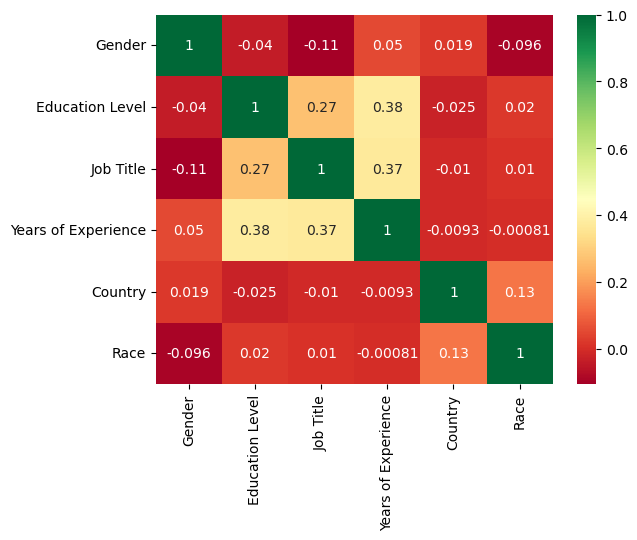

In [157]:
def matrix_corr(data): 
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
#Matriz de correlacion para los datos 

matrix_corr(X_train_res)

In [158]:
regresion_lineal.fit(X_train_res,Y_train_res)
Y_pred = regresion_lineal.predict(X_test)
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) 
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

m = [3795.71749115 9842.55003685  -55.3571801  4550.65525948 -306.29873528
  150.48538678], b = 58604.712352052535
Mean squared error: 1046092297.51
Coefficient of determination: 0.62


In [156]:
from imblearn.combine import SMOTETomek
os_us = SMOTETomek()
X_train_res, Y_train_res = os_us.fit_resample(X, Y)
X_train_res


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

In [ ]:
regresion_lineal.fit(X_train_res,Y_train_res)
Y_pred = regresion_lineal.predict(X_test)
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) 
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

m = [3811.43650135 9573.51925366  -47.68608427 4565.43014091 -401.91865089
  155.46935635], b = 58854.34444632084
Mean squared error: 1036730469.20
Coefficient of determination: 0.62
